<a href="https://colab.research.google.com/github/MalVaroTor/MalVaroTor/blob/main/TCC_1_DESCOBRINDO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORTANDO AS BIBLIOTECAS E LENDO O ARQUIVO EM EXCEL.**


---

O NOME DO ARQUIVO VAI TER O NOME DE 'db', DE DATABASE.

In [40]:
# IMPORTANDO BIBLIOTECA PARA DADOS.
import pandas as pd

# IMPORTANDO BIBLIOTECA PARA GRÁFICOS.
import matplotlib.pyplot as plt

# IMPOTANDO BIBLIOTECA PARA TRABALHAR COM NÚMEROS.
import numpy as np

# LENDO O ARQUIVO NO DRIVE.
db = pd.read_excel('/content/drive/MyDrive/TCC/db_dados/all_dados_I_V_T.xlsx')

# APRESENTANDO VISUALMENTE A TABELA.
display(db)

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Data/Hora,Data,Hora,Temperatura_in_A_[ºC],Temperatura_out_O2_A_[ºC],Temperatura_out_H2_A_[ºC],Corrente_A_[A],Tensao_A_[V],Temperatura_in_B_[ºC],Temperatura_out_O2_B_[ºC],Temperatura_out_H2_B_[ºC],Corrente_B_[A],Tensao_B_[V],PowerSet_[%],Pressão_Buffer_[Nm3/h]
0,2023-01-17 09:53:15.000,2023-01-17 00:00:00,09:53:15,28.1,28.9,28.8,0.1,0.0,30.7,29.3,28.8,0.0,0.0,30,13.6
1,2023-01-17 09:53:30.000,2023-01-17 00:00:00,09:53:30,28.2,28.9,28.8,0.1,0.0,30.7,29.3,28.8,0.0,0.0,30,13.6
2,2023-01-17 09:53:45.000,2023-01-17 00:00:00,09:53:45,28.2,29.0,28.8,0.1,0.0,30.7,29.3,28.8,0.0,0.0,30,13.6
3,2023-01-17 09:54:00.000,2023-01-17 00:00:00,09:54:00,28.2,29.0,28.9,0.1,0.0,30.8,29.3,28.9,0.0,0.0,30,13.6
4,2023-01-17 09:54:15.000,2023-01-17 00:00:00,09:54:15,28.2,29.0,28.9,0.1,0.0,30.8,29.3,28.9,0.0,0.0,30,13.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58106,2024-02-29 12:00:23.826,29/02/2024,12:00:24,31.7,41.2,40.4,0.2,0.5,33.6,41.6,40.4,3.6,0.0,50,14.1
58107,2024-02-29 12:00:38.826,29/02/2024,12:00:39,32.9,41.0,40.2,0.2,0.5,33.4,41.7,40.2,3.6,0.0,50,14.1
58108,2024-02-29 12:00:53.826,29/02/2024,12:00:54,33.5,40.7,40.1,0.3,0.4,33.5,41.7,40.1,3.6,0.0,50,14.1
58109,2024-02-29 12:01:08.826,29/02/2024,12:01:09,33.5,40.7,39.9,0.2,0.4,33.8,41.7,39.9,3.6,0.0,30,14.1


# **TRANSFORMANDO A COLUNA 'Data' NO FORMADO 'DD/MM/AAAA'.**

---



In [41]:
db['Data'] = pd.to_datetime(db['Data'])
db['Data'] = db['Data'].dt.strftime('%d/%m/%Y')

display(db)

<ipython-input-41-b03142e2cd27>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  db['Data'] = pd.to_datetime(db['Data'])


,Data/Hora,Data,Hora,Temperatura_in_A_[ºC],Temperatura_out_O2_A_[ºC],Temperatura_out_H2_A_[ºC],Corrente_A_[A],Tensao_A_[V],Temperatura_in_B_[ºC],Temperatura_out_O2_B_[ºC],Temperatura_out_H2_B_[ºC],Corrente_B_[A],Tensao_B_[V],PowerSet_[%],Pressão_Buffer_[Nm3/h]
0,2023-01-17 09:53:15.000,17/01/2023,09:53:15,28.1,28.9,28.8,0.1,0.0,30.7,29.3,28.8,0.0,0.0,30,13.6
1,2023-01-17 09:53:30.000,17/01/2023,09:53:30,28.2,28.9,28.8,0.1,0.0,30.7,29.3,28.8,0.0,0.0,30,13.6
2,2023-01-17 09:53:45.000,17/01/2023,09:53:45,28.2,29.0,28.8,0.1,0.0,30.7,29.3,28.8,0.0,0.0,30,13.6
3,2023-01-17 09:54:00.000,17/01/2023,09:54:00,28.2,29.0,28.9,0.1,0.0,30.8,29.3,28.9,0.0,0.0,30,13.6
4,2023-01-17 09:54:15.000,17/01/2023,09:54:15,28.2,29.0,28.9,0.1,0.0,30.8,29.3,28.9,0.0,0.0,30,13.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58106,2024-02-29 12:00:23.826,29/02/2024,12:00:24,31.7,41.2,40.4,0.2,0.5,33.6,41.6,40.4,3.6,0.0,50,14.1
58107,2024-02-29 12:00:38.826,29/02/2024,12:00:39,32.9,41.0,40.2,0.2,0.5,33.4,41.7,40.2,3.6,0.0,50,14.1
58108,2024-02-29 12:00:53.826,29/02/2024,12:00:54,33.5,40.7,40.1,0.3,0.4,33.5,41.7,40.1,3.6,0.0,50,14.1
58109,2024-02-29 12:01:08.826,29/02/2024,12:01:09,33.5,40.7,39.9,0.2,0.4,33.8,41.7,39.9,3.6,0.0,30,14.1


# **MOSTRANDO OS TIPOS DE DADOS DO 'db'.**

---



In [42]:
# TRAZENDO OS TIPOS DE DADOS DA TABELA.
tipos_dados = db.dtypes

# MOSTRANDO/APRESENTANDO OS RESULTADOS.
print(tipos_dados)

Data/Hora                    datetime64[ns]
Data                                 object
Hora                                 object
Temperatura_in_A_[ºC]               float64
Temperatura_out_O2_A_[ºC]           float64
Temperatura_out_H2_A_[ºC]           float64
Corrente_A_[A]                      float64
Tensao_A_[V]                        float64
Temperatura_in_B_[ºC]               float64
Temperatura_out_O2_B_[ºC]           float64
Temperatura_out_H2_B_[ºC]           float64
Corrente_B_[A]                      float64
Tensao_B_[V]                        float64
PowerSet_[%]                          int64
Pressão_Buffer_[Nm3/h]              float64
dtype: object


# **FILTRANDO A TABELA PARA APENAS 1 DIA EM ESPECÍFICO. O DB DO DIA SERÁ CHAMADO 'db_dia'.**

---

In [43]:
# FILTRANDO A TABELA EM UM DIA ESPECÍFICO.
db_dia = db.loc[db['Data/Hora'].dt.date == pd.to_datetime('2023-01-17').date()]

display(db_dia)

,Data/Hora,Data,Hora,Temperatura_in_A_[ºC],Temperatura_out_O2_A_[ºC],Temperatura_out_H2_A_[ºC],Corrente_A_[A],Tensao_A_[V],Temperatura_in_B_[ºC],Temperatura_out_O2_B_[ºC],Temperatura_out_H2_B_[ºC],Corrente_B_[A],Tensao_B_[V],PowerSet_[%],Pressão_Buffer_[Nm3/h]
0,2023-01-17 09:53:15,17/01/2023,09:53:15,28.1,28.9,28.8,0.1,0.0,30.7,29.3,28.8,0.0,0.0,30,13.6
1,2023-01-17 09:53:30,17/01/2023,09:53:30,28.2,28.9,28.8,0.1,0.0,30.7,29.3,28.8,0.0,0.0,30,13.6
2,2023-01-17 09:53:45,17/01/2023,09:53:45,28.2,29.0,28.8,0.1,0.0,30.7,29.3,28.8,0.0,0.0,30,13.6
3,2023-01-17 09:54:00,17/01/2023,09:54:00,28.2,29.0,28.9,0.1,0.0,30.8,29.3,28.9,0.0,0.0,30,13.6
4,2023-01-17 09:54:15,17/01/2023,09:54:15,28.2,29.0,28.9,0.1,0.0,30.8,29.3,28.9,0.0,0.0,30,13.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,2023-01-17 11:17:15,17/01/2023,11:17:15,32.4,41.5,40.1,0.1,0.4,35.0,39.5,40.1,1.3,0.0,50,14.2
337,2023-01-17 11:17:30,17/01/2023,11:17:30,33.0,41.3,40.0,0.2,0.4,35.4,39.3,40.0,1.3,0.0,30,14.2
338,2023-01-17 11:17:45,17/01/2023,11:17:45,33.4,41.3,39.8,0.2,0.4,35.0,39.2,39.8,1.3,0.0,30,14.2
339,2023-01-17 11:18:00,17/01/2023,11:18:00,32.6,41.0,39.8,0.2,0.4,35.0,39.1,39.8,1.3,0.0,30,14.2


# **CRIANDO E FORMATANDO O GRÁFICO DE CORRENTES A E B.**

---



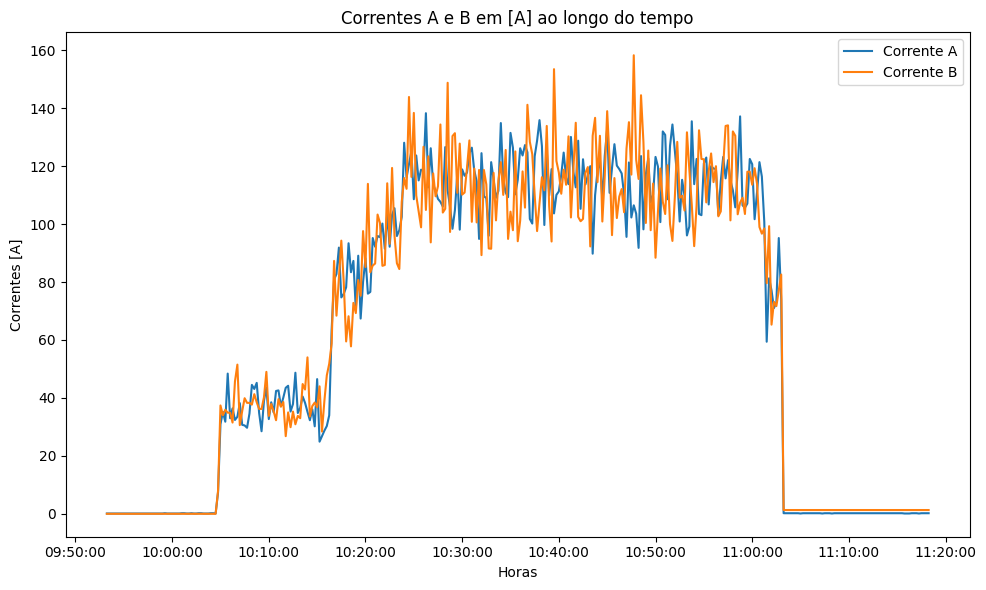

In [44]:
# CRIANDO A FIGURA.
plt.figure(figsize=(10, 6))

# PLOTANDO OS DADOS DO GRÁFICO.
plt.plot(db_dia['Data/Hora'], \
            db_dia['Corrente_A_[A]'], \
                label='Corrente A')

plt.plot(db_dia['Data/Hora'], \
            db_dia['Corrente_B_[A]'], \
                label='Corrente B')

# ADICIONANDO OS EIXOS.
plt.xlabel('Horas')

plt.ylabel('Correntes [A]')

# ADICIONANDO O TÍTULO.
plt.title('Correntes A e B em [A] ao longo do tempo')

# # ADICIONANDO A LEGENDA.
plt.legend()

# FORMATANDO O EIXO X.
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M:%S'))

# INCLINANDO O EIXO X.
# plt.xticks(rotation=45)

# EXIBINDO O GRÁFICO.
plt.tight_layout()

plt.show()

# **CRIANDO AS COLUNAS DE POTÊNCIA DE A E DE B.**

---



In [45]:
# CALCULANDO A POTÊNCIA DE A.
# db_dia['Potencia_A_[kW]'] = db_dia['Corrente_A_[A]'] * db_dia['Tensao_A_[V]'] / 1000

# TRAZENDO O ÍNDICE DA COLUNA 'Tensao_A_[V]'.
indice_tensao_a = db_dia.columns.get_loc('Tensao_A_[V]')

# INSERINDO A COLUNA 'Potencia_A_[kW]' DEPOIS DA COLUNA 'Tensao_A_[V]'.
db_dia.insert(indice_tensao_a + 1, \
                'Potencia_A_[kW]', \
                    db_dia['Corrente_A_[A]'] * db_dia['Tensao_A_[V]'] / 1000)

# TRAZENDO O ÍNDICE DA COLUNA 'Tensao_B_[V]'.
indice_tensao_B = db_dia.columns.get_loc('Tensao_B_[V]')

# INSERINDO A COLUNA 'Potencia_B_[kW]' DEPOIS DA COLUNA 'Tensao_B_[V]'.
db_dia.insert(indice_tensao_B + 1, \
                'Potencia_B_[kW]', \
                    db_dia['Corrente_B_[A]'] * db_dia['Tensao_B_[V]'] / 1000)

display(db_dia)

,Data/Hora,Data,Hora,Temperatura_in_A_[ºC],Temperatura_out_O2_A_[ºC],Temperatura_out_H2_A_[ºC],Corrente_A_[A],Tensao_A_[V],Potencia_A_[kW],Temperatura_in_B_[ºC],Temperatura_out_O2_B_[ºC],Temperatura_out_H2_B_[ºC],Corrente_B_[A],Tensao_B_[V],Potencia_B_[kW],PowerSet_[%],Pressão_Buffer_[Nm3/h]
0,2023-01-17 09:53:15,17/01/2023,09:53:15,28.1,28.9,28.8,0.1,0.0,0.00000,30.7,29.3,28.8,0.0,0.0,0.0,30,13.6
1,2023-01-17 09:53:30,17/01/2023,09:53:30,28.2,28.9,28.8,0.1,0.0,0.00000,30.7,29.3,28.8,0.0,0.0,0.0,30,13.6
2,2023-01-17 09:53:45,17/01/2023,09:53:45,28.2,29.0,28.8,0.1,0.0,0.00000,30.7,29.3,28.8,0.0,0.0,0.0,30,13.6
3,2023-01-17 09:54:00,17/01/2023,09:54:00,28.2,29.0,28.9,0.1,0.0,0.00000,30.8,29.3,28.9,0.0,0.0,0.0,30,13.6
4,2023-01-17 09:54:15,17/01/2023,09:54:15,28.2,29.0,28.9,0.1,0.0,0.00000,30.8,29.3,28.9,0.0,0.0,0.0,30,13.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,2023-01-17 11:17:15,17/01/2023,11:17:15,32.4,41.5,40.1,0.1,0.4,0.00004,35.0,39.5,40.1,1.3,0.0,0.0,50,14.2
337,2023-01-17 11:17:30,17/01/2023,11:17:30,33.0,41.3,40.0,0.2,0.4,0.00008,35.4,39.3,40.0,1.3,0.0,0.0,30,14.2
338,2023-01-17 11:17:45,17/01/2023,11:17:45,33.4,41.3,39.8,0.2,0.4,0.00008,35.0,39.2,39.8,1.3,0.0,0.0,30,14.2
339,2023-01-17 11:18:00,17/01/2023,11:18:00,32.6,41.0,39.8,0.2,0.4,0.00008,35.0,39.1,39.8,1.3,0.0,0.0,30,14.2


# **CRIANDO A COLUNA DE HORAS EM FORMATO DECIMAL.**

---

In [46]:
# CRIANDO A COLUNA 'Hora_decimal'.
db_dia['Hora_decimal'] = db_dia['Data/Hora'].dt.hour + \
                                db_dia['Data/Hora'].dt.minute / 60 + \
                                    db_dia['Data/Hora'].dt.second / 3600

display(db_dia)

<ipython-input-46-ab8d1de6ca18>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_dia['Hora_decimal'] = db_dia['Data/Hora'].dt.hour + \


,Data/Hora,Data,Hora,Temperatura_in_A_[ºC],Temperatura_out_O2_A_[ºC],Temperatura_out_H2_A_[ºC],Corrente_A_[A],Tensao_A_[V],Potencia_A_[kW],Temperatura_in_B_[ºC],Temperatura_out_O2_B_[ºC],Temperatura_out_H2_B_[ºC],Corrente_B_[A],Tensao_B_[V],Potencia_B_[kW],PowerSet_[%],Pressão_Buffer_[Nm3/h],Hora_decimal
0,2023-01-17 09:53:15,17/01/2023,09:53:15,28.1,28.9,28.8,0.1,0.0,0.00000,30.7,29.3,28.8,0.0,0.0,0.0,30,13.6,9.887500
1,2023-01-17 09:53:30,17/01/2023,09:53:30,28.2,28.9,28.8,0.1,0.0,0.00000,30.7,29.3,28.8,0.0,0.0,0.0,30,13.6,9.891667
2,2023-01-17 09:53:45,17/01/2023,09:53:45,28.2,29.0,28.8,0.1,0.0,0.00000,30.7,29.3,28.8,0.0,0.0,0.0,30,13.6,9.895833
3,2023-01-17 09:54:00,17/01/2023,09:54:00,28.2,29.0,28.9,0.1,0.0,0.00000,30.8,29.3,28.9,0.0,0.0,0.0,30,13.6,9.900000
4,2023-01-17 09:54:15,17/01/2023,09:54:15,28.2,29.0,28.9,0.1,0.0,0.00000,30.8,29.3,28.9,0.0,0.0,0.0,30,13.6,9.904167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,2023-01-17 11:17:15,17/01/2023,11:17:15,32.4,41.5,40.1,0.1,0.4,0.00004,35.0,39.5,40.1,1.3,0.0,0.0,50,14.2,11.287500
337,2023-01-17 11:17:30,17/01/2023,11:17:30,33.0,41.3,40.0,0.2,0.4,0.00008,35.4,39.3,40.0,1.3,0.0,0.0,30,14.2,11.291667
338,2023-01-17 11:17:45,17/01/2023,11:17:45,33.4,41.3,39.8,0.2,0.4,0.00008,35.0,39.2,39.8,1.3,0.0,0.0,30,14.2,11.295833
339,2023-01-17 11:18:00,17/01/2023,11:18:00,32.6,41.0,39.8,0.2,0.4,0.00008,35.0,39.1,39.8,1.3,0.0,0.0,30,14.2,11.300000


# **GERANDO O GRÁFICO DE POTÊNCIA DE A AO LONGO DO TEMPO E CALCULANDO SUA ENERGIA.**

---



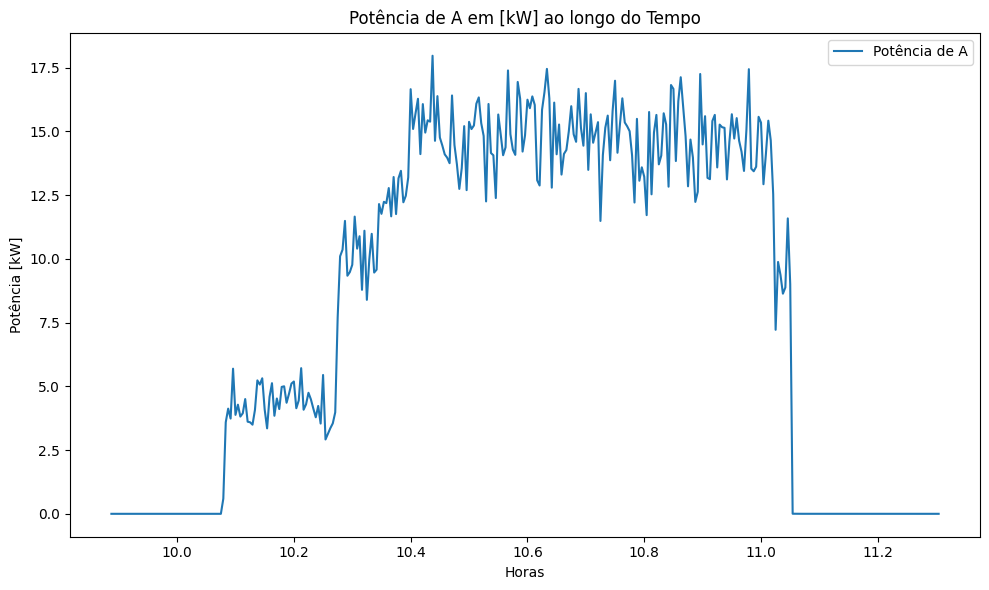

In [47]:
# CRIANDO A FIGURA.
plt.figure(figsize=(10, 6))

# PLOTANDO OS DADOS DO GRÁFICO.
plt.plot(db_dia['Hora_decimal'], \
            db_dia['Potencia_A_[kW]'], \
                label='Potência de A')

# ADICIONADNO OS EIXOS.
plt.xlabel('Horas')

plt.ylabel('Potência [kW]')

# ADICIONADNO O TÍTULO.
plt.title('Potência de A em [kW] ao longo do Tempo')

# ADICIONADNO A LEGENDA.
plt.legend()

# EXIBINDO O GRÁFICO.
plt.tight_layout()

plt.show()

# **PREENCHENDO A ÁREA SOB O GRÁFICO.**

---



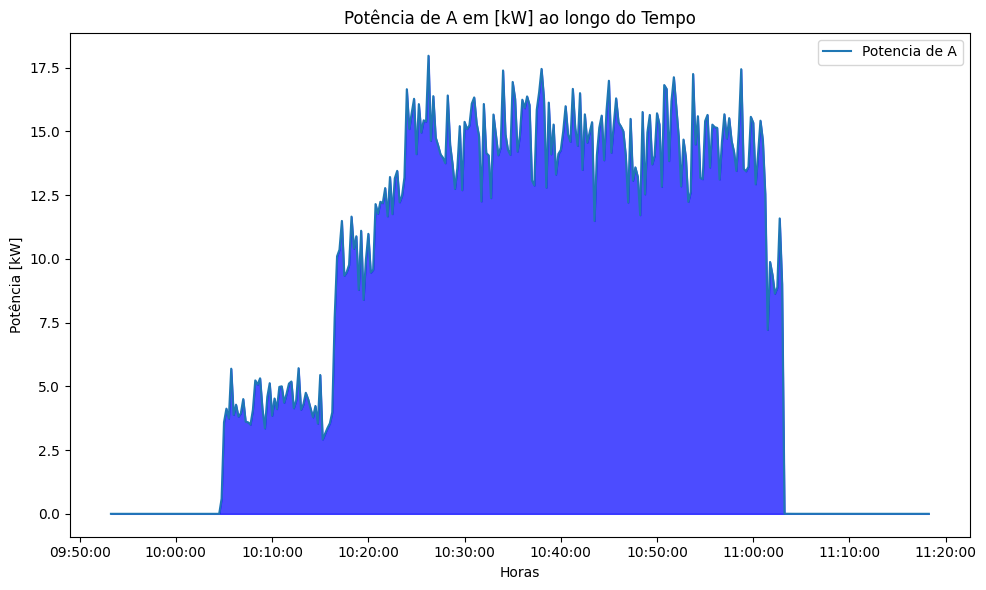

In [48]:
# CRIANDO A FIGURA.
plt.figure(figsize=(10, 6))

# PLOTANDO OS DADOS DO GRÁFICO.
plt.plot(db_dia['Data/Hora'], \
            db_dia['Potencia_A_[kW]'], \
                label='Potencia de A')

# PREENCHENDO A ÁREA SOB O GRÁFICO.
plt.fill_between(db_dia['Data/Hora'], \
                    db_dia['Potencia_A_[kW]'], \
                        color='blue', \
                            alpha=0.7)

# ADICIONADNO OS EIXOS.
plt.xlabel('Horas')

plt.ylabel('Potência [kW]')

# ADICIONADNO O TÍTULO.
plt.title('Potência de A em [kW] ao longo do Tempo')

# # ADICIONADNO A LEGENDA.
plt.legend()

# FORMATANDO O EIXO X.
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M:%S'))

# EXIBINDO O GRÁFICO.
plt.tight_layout()

plt.show()

# **CÁLCULO DA ENERGIA DE A ATRAVÉS DA INTEGRAL.**

---



In [49]:
# CALCULANDO A INTEGRAL PELO MÉTODO DO TRAPÉZIO.
integral_PotenciaA = np.trapz(db_dia['Potencia_A_[kW]'], \
                                db_dia['Hora_decimal'])

# FORMATANDO O DADO DA INTEGRAL PARA 3 DÍGITOS.
integral_PotenciaA = round(integral_PotenciaA , 3)

# IMPRIMINDO O RESULTADO.
print("Energia de A:", integral_PotenciaA, "[kJ]")

Energia de A: 11.726 [kJ]


# **GERANDO O GRÁFICO DE POTÊNCIA DE B AO LONGO DO TEMPO E CALCULANDO SUA ENERGIA.**

---



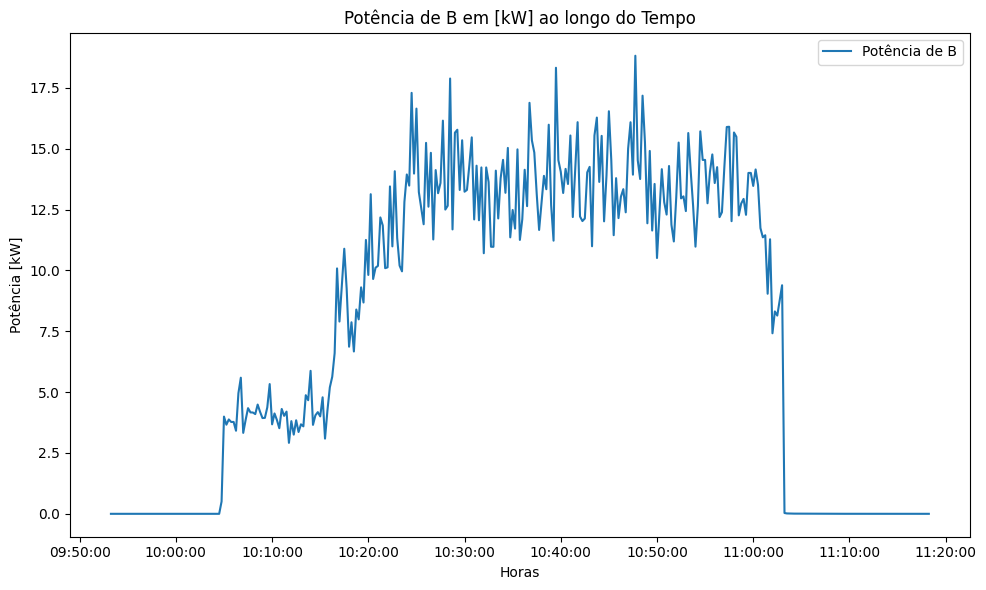

In [50]:
# CRIANDO A FIGURA.
plt.figure(figsize=(10, 6))

# PLOTANDO OS DADOS DO GRÁFICO.
plt.plot(db_dia['Data/Hora'], \
            db_dia['Potencia_B_[kW]'], \
                label='Potência de B')

# ADICIONADNO OS EIXOS.
plt.xlabel('Horas')

plt.ylabel('Potência [kW]')

# ADICIONADNO O TÍTULO.
plt.title('Potência de B em [kW] ao longo do Tempo')

# ADICIONADNO A LEGENDA.
plt.legend()

# FORMATANDO O EIXO X.
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M:%S'))

# EXIBINDO O GRÁFICO.
plt.tight_layout()

plt.show()

# **PREENCHENDO A ÁREA SOB O GRÁFICO.**

---

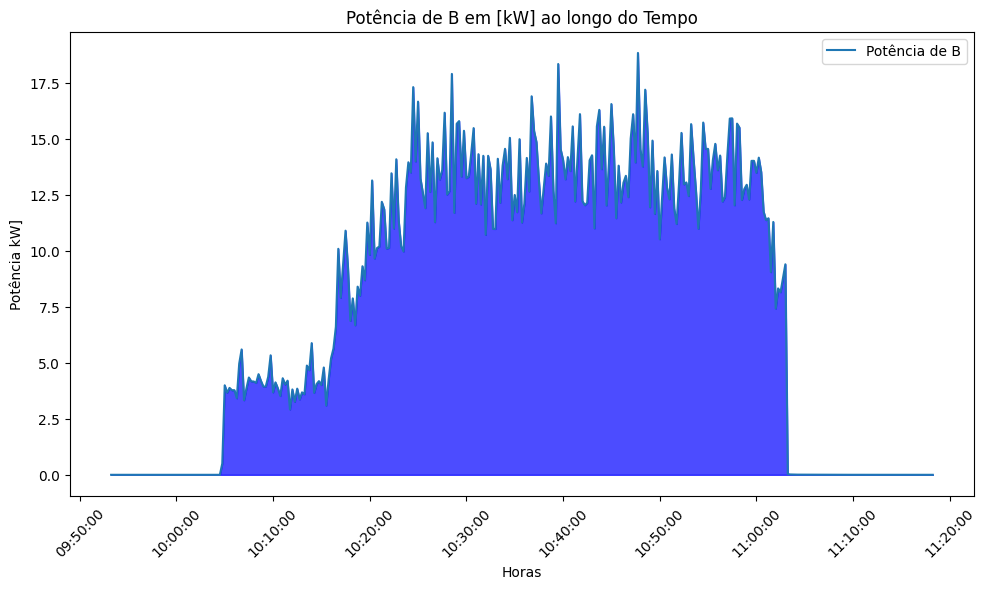

In [51]:
# CRIANDO A FIGURA.
plt.figure(figsize=(10, 6))

# PLOTANDO OS DADOS DO GRÁFICO.
plt.plot(db_dia['Data/Hora'], \
            db_dia['Potencia_B_[kW]'], \
                label='Potência de B')

# PREENCHENDO A ÁREA SOB O GRÁFICO.
plt.fill_between(db_dia['Data/Hora'], \
                    db_dia['Potencia_B_[kW]'], \
                        color='blue', \
                            alpha=0.7)

# ADICIONADNO OS EIXOS.
plt.xlabel('Horas')

plt.ylabel('Potência kW]')

plt.title('Potência de B em [kW] ao longo do Tempo')

# ADICIONADNO A LEGENDA.
plt.legend()

# INCLINADNO O EIXO X.
plt.xticks(rotation=45)

# FORMATANDO O EIXO X.
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M:%S'))

# EXIBINDO O GRÁFICO.
plt.tight_layout()

plt.show()

# **CÁLCULO DA ENERGIA DE B ATRAVÉS DA INTEGRAL.**

---



In [52]:
# CALCULANDO A INTEGRAL PELO MÉTODO DO TRAPÉZIO.
integral_PotenciaB = np.trapz(db_dia['Potencia_B_[kW]'], \
                                db_dia['Hora_decimal'])

# FORMATANDO O DADO DA INTEGRAL PARA 3 DÍGITOS.
integral_PotenciaB = round(integral_PotenciaB , 3)

# IMPRIMINDO O RESULTADO.
print("Energia de B:", integral_PotenciaB, "[kJ]")

Energia de B: 10.849 [kJ]


# **TESTES EM GRÁFICOS.**

---



# **GERANDO GRÁFICO DE CORRENTES A E B COM POWERSET AO LONGO DO TEMPO.**

---


# **GRÁFICO 1.**

---



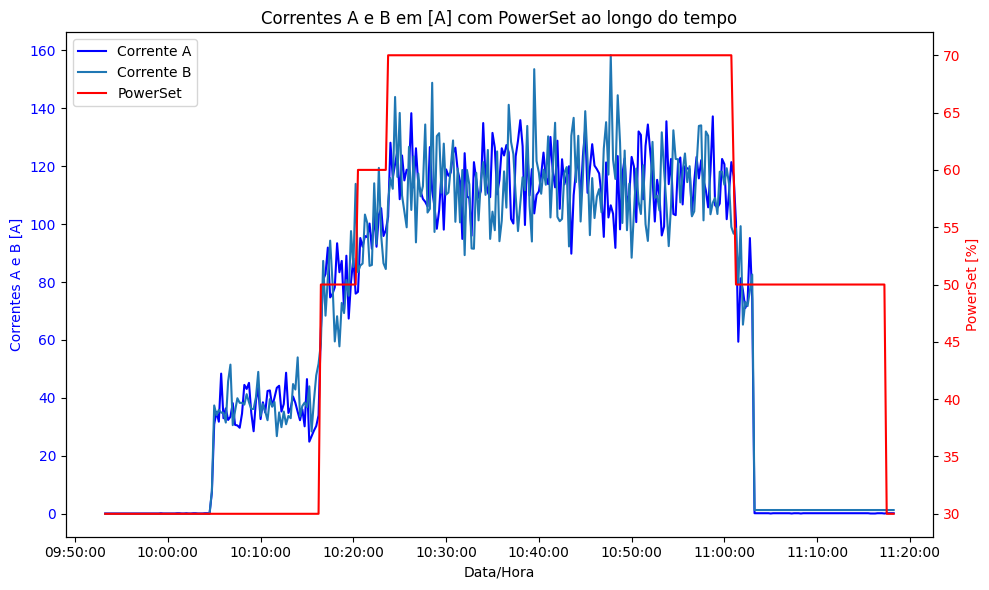

In [53]:
# CRIANDO A FIGURA.
fig, ax1 = plt.subplots(figsize=(10, 6))

# PLOTANDO OS DADOS PARA O PRIMEIRO EIXO Y (À ESQUERDA).
ax1.plot(db_dia['Data/Hora'], \
            db_dia['Corrente_A_[A]'], \
                label='Corrente A', \
                    color='blue')

plt.plot(db_dia['Data/Hora'], db_dia['Corrente_B_[A]'], \
            label='Corrente B')

ax1.set_xlabel('Data/Hora')

ax1.set_ylabel('Correntes A e B [A]', \
                    color='blue')

ax1.tick_params(axis='y', \
                    labelcolor='blue')

# PLOTANDO OS DADOS PARA O SEGUNDO EIXO Y (À DIREITA).
ax2 = ax1.twinx()

ax2.plot(db_dia['Data/Hora'], \
            db_dia['PowerSet_[%]'], \
                label='PowerSet', \
                    color='red')

ax2.set_ylabel('PowerSet [%]', \
                    color='red')

ax2.tick_params(axis='y', \
                    labelcolor='red')

# ADICIONADNO A LEGENDA.
lines, labels = ax1.get_legend_handles_labels()

lines2, labels2 = ax2.get_legend_handles_labels()

ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# FORMATANDO O EIXO X.
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M:%S'))

# ADICIONADNO O TÍTULO.
plt.title('Correntes A e B em [A] com PowerSet ao longo do tempo')

# EXIBINDO O GRÁFICO.
plt.tight_layout()

plt.show()

# **GRÁFICO 2.**

---



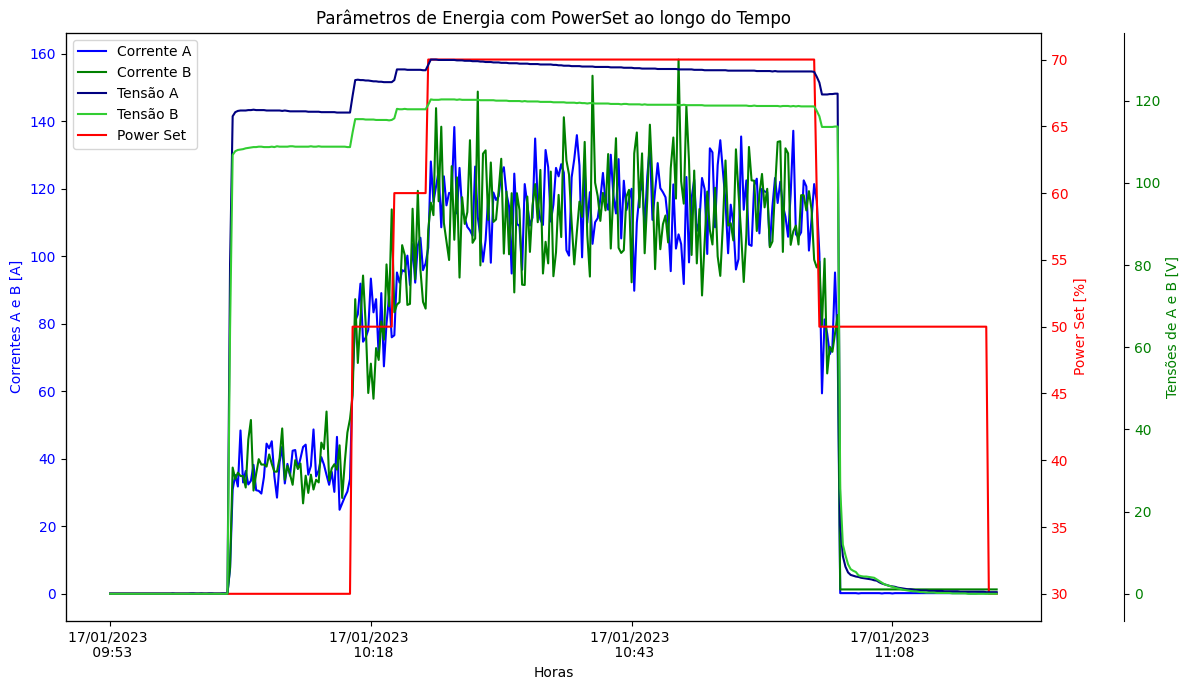

In [54]:
# CRIANDO A FIGURA.
fig, ax1 = plt.subplots(figsize=(12, 7))

# PLOTANDO OS DADOS E CRIANDO O EIXO Y ESQUERDO.
ax1.plot(db_dia['Data/Hora'], \
            db_dia['Corrente_A_[A]'], \
                label='Corrente A', \
                    color='blue')

ax1.plot(db_dia['Data/Hora'], \
            db_dia['Corrente_B_[A]'], \
                label='Corrente B', \
                    color='green')

ax1.set_xlabel('Horas')

ax1.set_ylabel('Correntes A e B [A]', color='blue')

ax1.tick_params(axis='y', labelcolor='blue')

# PLOTANDO OS DADOS E CRIANDO O 1º EIXO Y DO LADO DIREITO.
ax1_2 = ax1.twinx()

ax1_2.plot(db_dia['Data/Hora'], \
            db_dia['PowerSet_[%]'], \
                label='Power Set', \
                    color='red')

ax1_2.set_ylabel('Power Set [%]', \
                    color='red')

ax1_2.tick_params(axis='y', \
                    labelcolor='red')

# PLOTANDO OS DADOS E CRIANDO O 2º EIXO Y DO LADO DIREITO.
ax1_3 = ax1.twinx()

ax1_3.spines['right'].set_position(('outward', 60))

ax1_3.plot(db_dia['Data/Hora'], \
            db_dia['Tensao_A_[V]'], \
                label='Tensão A', \
                    color='navy')

ax1_3.plot(db_dia['Data/Hora'], \
            db_dia['Tensao_B_[V]'], \
                label='Tensão B', \
                    color='limegreen')

ax1_3.set_ylabel('Tensões de A e B [V]', \
                    color='green')

ax1_3.tick_params(axis='y', \
                    labelcolor='green')

# ADICIONADNDO A LEGENDA.
lines, labels = ax1.get_legend_handles_labels()

lines2, labels2 = ax1_2.get_legend_handles_labels()

lines3, labels3 = ax1_3.get_legend_handles_labels()

ax1.legend(lines + lines3 + lines2, \
                labels + labels3 + labels2, \
                            loc='upper left')   # MUDANDO A ORDEM QUE APARECE OS PARÂMETROS NA LEGENDA.

# COLOCANDO O TÍTULO DO GRÁFICO.
plt.title('Parâmetros de Energia com PowerSet ao longo do Tempo')

# EDITANDO O EIXO X.
plt.xticks(rotation=90)

ax1.set_xticks(db_dia['Data/Hora'][::100])  # EXIBE APENAS OS 100º TICK PARA EVISTAR SOBREPOSIÇÃO.

# ax1.set_xticklabels(db_dia['HORA'][::100].dt.strftime('%Y-%m-%d %H:%M:%S'))

ax1.set_xticklabels(db_dia['Data/Hora'][::100].dt.strftime('%d/%m/%Y \n %H:%M'))

# MOSTRANDO O GRÁFICO.
plt.tight_layout()

plt.show()